<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
User uploaded file "heart.csv" with length 11328 bytes


I followed towards Data Scienec blogs
link :- https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

In [7]:
df=pd.read_csv('heart.csv')

In [8]:
df.shape

(303, 14)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1


## Data Preparation

* Data Cleaning
* Data Exploration

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df.drop(columns='thal',inplace=True)

In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [35]:
df.duplicated().sum()

0

In [36]:
df.drop_duplicates(inplace=True)

Let's Visualize the data for understand the insights of data

<Axes: >

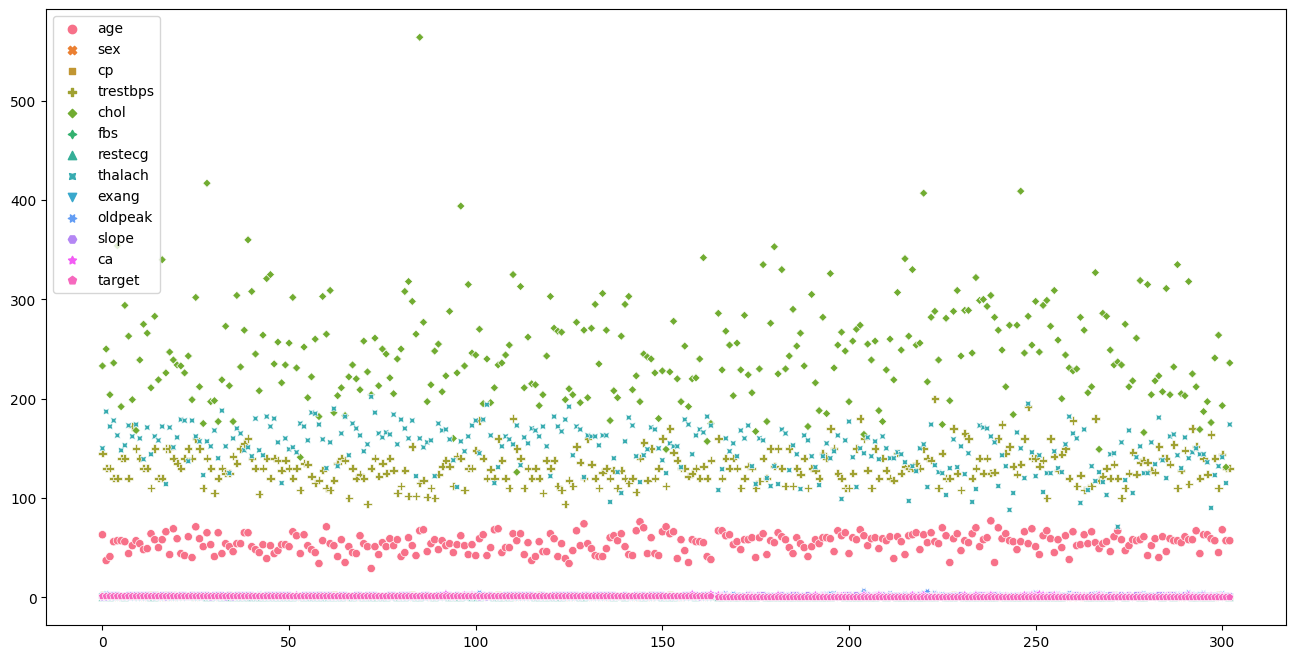

In [37]:
plt.figure(figsize=(16,8))
sns.scatterplot(df)

<Axes: >

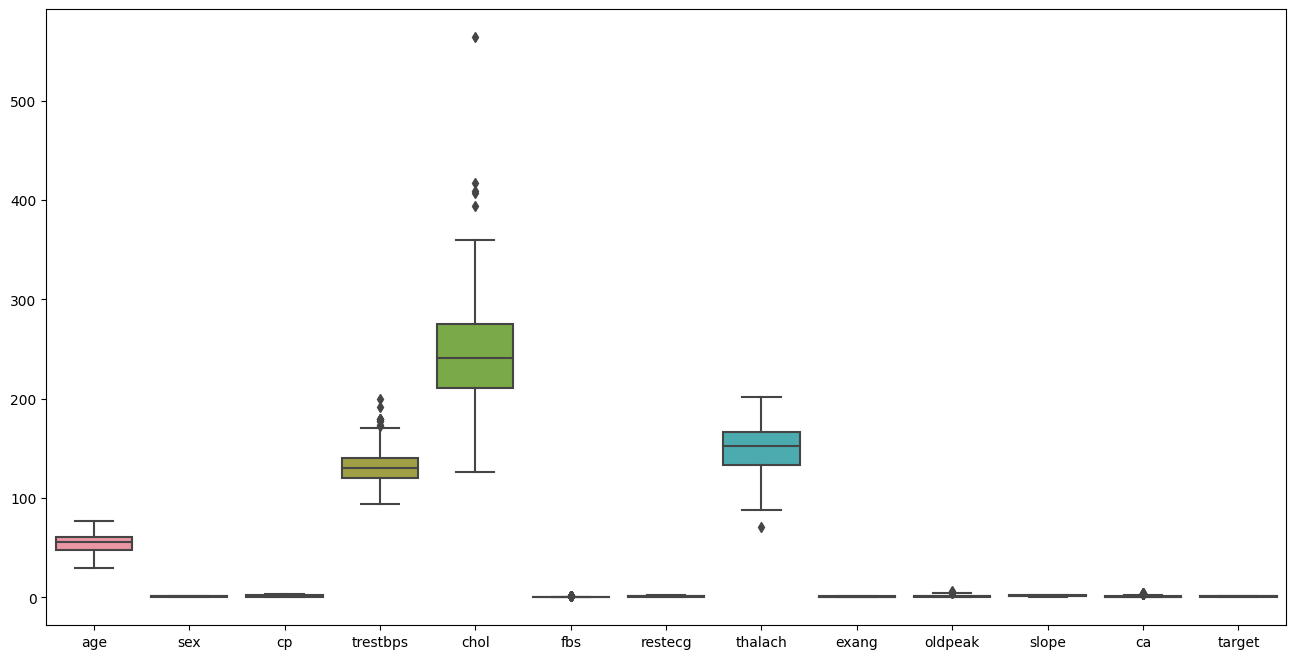

In [38]:
plt.figure(figsize=(16,8))
sns.boxplot(df)

<Axes: >

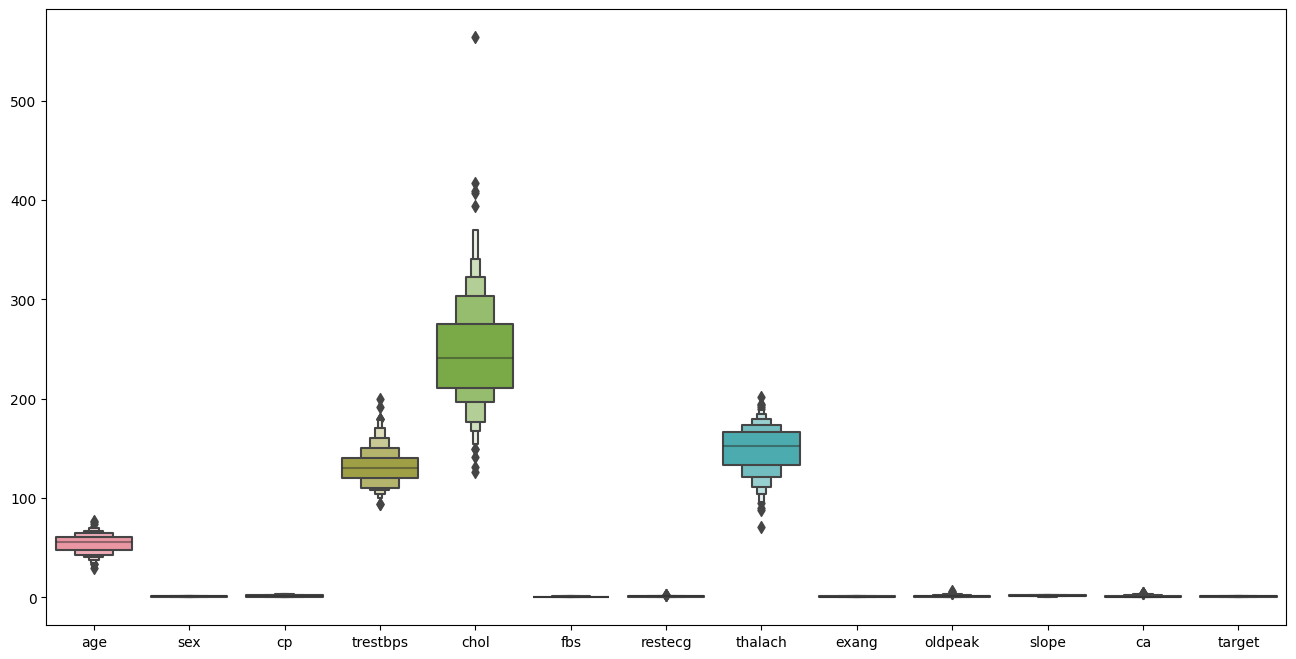

In [39]:
plt.figure(figsize=(16,8))
sns.boxenplot(df)

<Axes: xlabel='target', ylabel='age'>

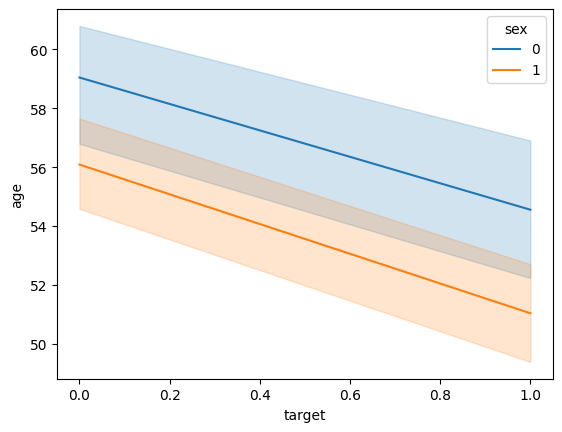

In [40]:
sns.lineplot(x=df['target'],y=df['age'],hue=df['sex'])#1 - male , 0 - female

When , A person have heart disease then maximum heart rate achieved

<Axes: xlabel='target', ylabel='thalach'>

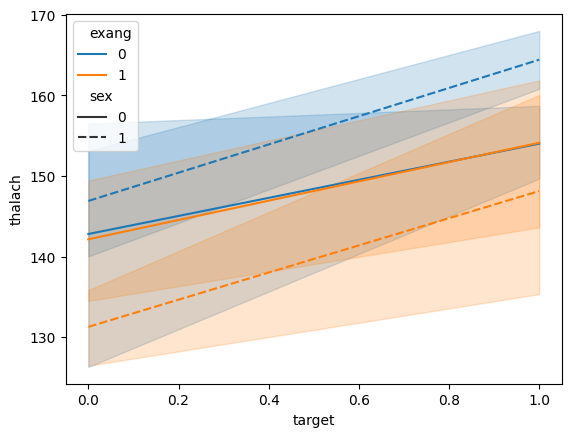

In [43]:
sns.lineplot(x=df['target'],y=df['thalach'],hue=df['exang'],style=df['sex'])

Spliting our dataset into two part train and test

In [45]:
X=df.drop(columns='target')
y=df['target']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Logistci Regreesion model

In [49]:
lg=LogisticRegression()

In [50]:
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred_lg=lg.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred_lg)

0.8852459016393442

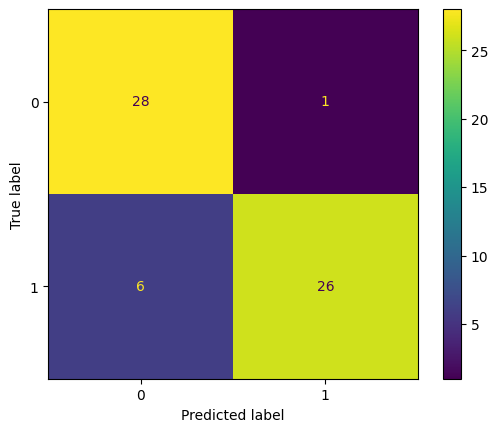

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lg)).plot()

In [56]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.96      0.81      0.88        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



Decision Tree Classification

In [59]:
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred_dtc)

0.819672131147541

In [76]:
svc=SVC(kernel="poly")
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred_svc)

0.7540983606557377

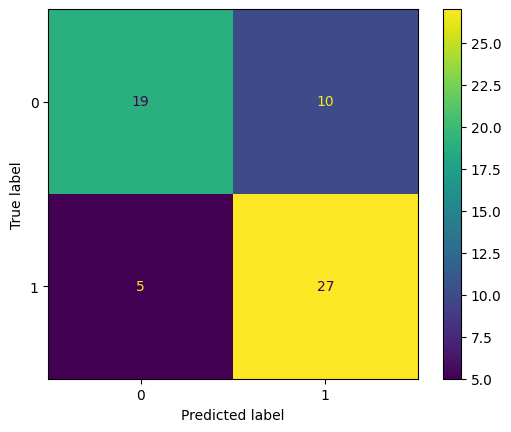

In [79]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc)).plot()

Now let's go for ensemble method

In [102]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost

Random Forest Classifier

In [86]:
rfc=RandomForestClassifier(criterion="gini")
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred_rfc)

0.8852459016393442

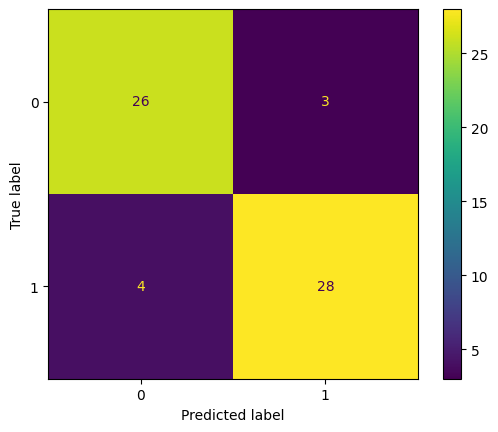

In [89]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

Bagging Classifier

In [91]:
bgg=BaggingClassifier(estimator=rfc)
bgg.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier())

In [94]:
y_pred_bgg=bgg.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred_bgg)

0.8852459016393442

In [97]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred_gbc)

0.8360655737704918

In [103]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
y_pred_xgb=xgb.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred_xgb)

0.8360655737704918